# Heart Disease Prediction

#### Importing dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ML algorithms 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
import pickle  # to save the model for further deployment

### Step 1: Load the dataset

In [3]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Step 2: Exploratory Data Analysis (EDA)

In [4]:
print(f"checking null values of columns\n {heart_data.isnull().sum()}")

checking null values of columns
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
print(f"checking summary of the data\n {heart_data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
checking summary of the data
 None


In [6]:
print("Statistical Measurements:")
heart_data.describe()

Statistical Measurements:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


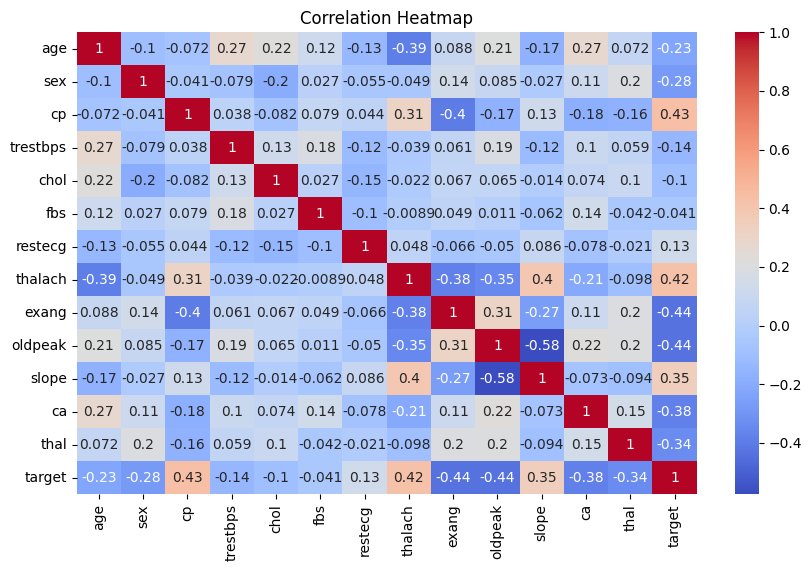

In [7]:
# Visualize data distribution
plt.figure(figsize=(10, 6))
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Step 3: Preprocessing the data

##### 1. Separate features and target variable

In [8]:
x = heart_data.drop(['target'], axis=1) # taking all the features
y = heart_data['target'] # taking the target (outcome)

##### 2. Split the data into training and testing sets

In [19]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [20]:
print(f"Training set size: {x_train.shape}, Testing set size: {x_test.shape}")

Training set size: (820, 13), Testing set size: (205, 13)


In [21]:
print(x_train.shape, x_test.shape)


(820, 13) (205, 13)


##### 3. Feature scaling

In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit(x_test)

### Step 4: Model Training

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("Model Training Completed")

Model Training Completed


### Step 5: Model Evaluation

#### 1. Predictions

In [25]:
y_pred = model.predict(x_train)

In [ ]:
y_pred

#### 2. Accuracy

In [28]:

accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


#### 2. Confusion Matrix

In [29]:

conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[309  81]
 [ 40 390]]


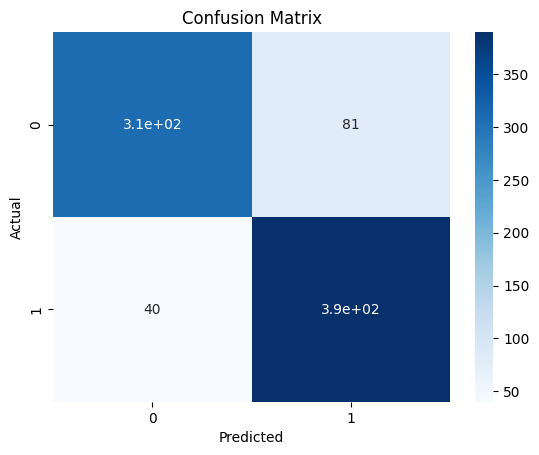

In [30]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### 3.Classification Report

In [32]:
report = classification_report(y_train, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       390
           1       0.83      0.91      0.87       430

    accuracy                           0.85       820
   macro avg       0.86      0.85      0.85       820
weighted avg       0.86      0.85      0.85       820



### Step 6: Save the Model

In [34]:
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as 'heart_disease_model.pkl'.")

Model saved as 'heart_disease_model.pkl'.
